# proactive interference during long evals
- presented at p6 fall 19
- model: NetBarCode
- task: TaskArbitraryMaps

In [27]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
wmsizeL=[4,6]
nmapsL=[4,5,6,8]
ntrialsL=[2,3]
trlenL = [6,10]
switchL=[1,0]

# accuracy

In [29]:
def load_trsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed=0):
  fdir = 'model_data/amtask_pieval/'
  fpath = "wmsize_%i-nmaps_%i-switch_%i-ntrials_%i-trlen_%i-seed_%i-wm_emkw_0.000500-trsc.npy"%(
          wmsize,nmaps,switch,ntrials,trlen,seed)
  try:
    trsc_subj = np.load(fdir+fpath)
  except:
    return None
  return trsc_subj

def load_trsc(wmsize,nmaps,switch,ntrials,trlen,nnets=20):
  L = []
  for seed in range(nnets):
    trsc_subj = load_trsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed)
    if type(trsc_subj) == type(None):
      continue
    L.append(trsc_subj)
  return np.array(L)

def load_evsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed=0):
  fdir = 'model_data/amtask_pieval/'
  fpath = "wmsize_%i-nmaps_%i-switch_%i-ntrials_%i-trlen_%i-seed_%i-wm_emkw_0.000500-evsc.npy"%(
          wmsize,nmaps,switch,ntrials,trlen,seed)
  try:
    evsc_subj = np.load(fdir+fpath)
  except:
    return None
  return evsc_subj

def load_evsc(wmsize,nmaps,switch,ntrials,trlen,nnets=20):
  L = []
  for seed in range(nnets):
    evsc_subj = load_evsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed)
    if type(evsc_subj) == type(None):
      continue
    L.append(evsc_subj)
  return np.array(L)

# train acc

IndexError: too many indices for array

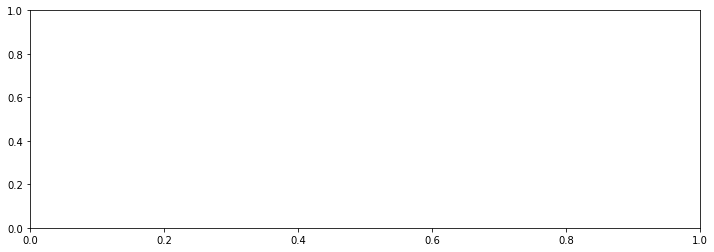

In [79]:
plt.figure(figsize=(12,4))
ax = plt.gca()
nnets_plt = 2
wmsize,nmaps=4,6
ntrials,trlen = 3,10
switch = 1

trsc = load_trsc(wmsize,nmaps,switch,ntrials,trlen,nnets=20)
trac = trsc[:,:,:,nmaps:].mean((2,3))
print(trac.shape)
for sub_trac in trac:
  plt.plot(mov_avg(sub_trac,500),lw=.3,c='b')
M = trac.mean(0)
plt.plot(mov_avg(M,10),c='k')
plt.ylim(0,1.05)

# eval acc

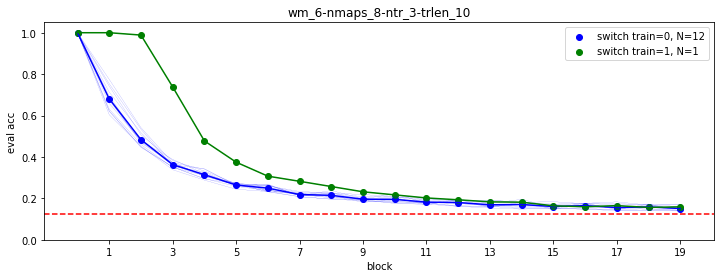

In [92]:
nnets_plt = 20
wmsize,nmaps=4,8
ntrials,trlen = 2,10

for wmsize,nmaps,ntrials,trlen in itertools.product(wmsizeL,nmapsL,ntrialsL,trlenL):
  
  plt.close('all')
  plt.figure(figsize=(12,4))
  ax = plt.gca()
  
  for switch,c in zip([0,1],['b','g']):
    evsc = load_evsc(wmsize,nmaps,switch,ntrials,trlen,nnets=nnets_plt)
    evac = evsc[:,:,:,nmaps:].mean((1,3))
    M = evac.mean(0)
    ax.plot(M,c=c)
    ax.scatter(range(len(M)),M,c=c,label='switch train=%i, N=%i'%(switch,len(evac)))
    for sac in evac:
      plt.plot(sac,c=c,lw=.1)

  ax.set_xticks(range(1,21,2))
  ax.axhline(1/nmaps,c='r',ls='--')
  ax.set_ylim(0,1.05)
  ax.set_xlabel('block')
  ax.set_ylabel('eval acc')
  plt.legend()
  title = "wm_%i-nmaps_%i-ntr_%i-trlen_%i"%(wmsize,nmaps,ntrials,trlen)
  plt.title(title)
  plt.savefig('figures/amtask_pieval/evac_by_block/eval_acc-'+title)

Text(0, 0.5, 'acc')

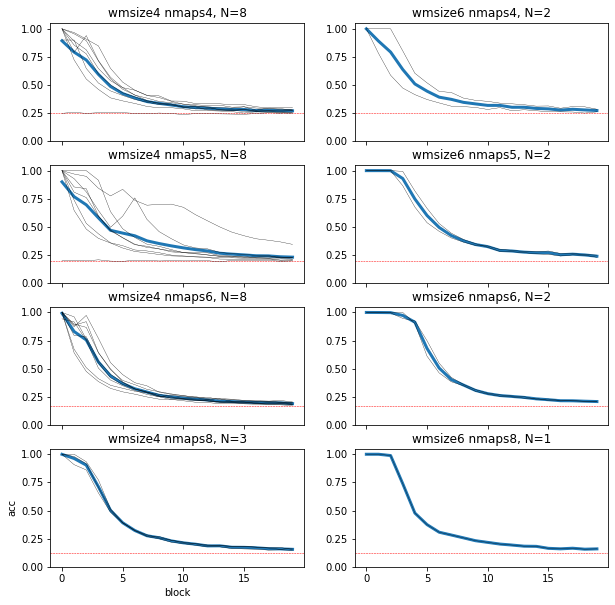

In [80]:
''' accuracy over blocks '''
trlen = 10
switch = 1
ntrials = 3
fig,axarr = plt.subplots(4,2,figsize=(10,10),sharex=True);axarr=axarr.reshape(-1)

for idx,(nmaps,wmsize) in enumerate(itertools.product(nmapsL,wmsizeL)):
  ax = axarr[idx]
  ax.set_ylim(0,1.05)
  ax.axhline(1/nmaps,c='red',ls='--',lw=.5)
  evsc = load_evsc(wmsize,nmaps,switch,ntrials,trlen,nnets=20)
  ax.set_title('wmsize%i nmaps%i, N=%i'%(wmsize,nmaps,len(evsc)))
  if not len(evsc): continue
  evac = evsc[:,:,:,nmaps:].mean((1,-1))
  M = evac.mean(0)
  ax.plot(M,lw=3)
  for evac_subj in evac:
    ax.plot(evac_subj,c='k',lw=.3)
axarr[6].set_xlabel('block')
axarr[6].set_ylabel('acc')

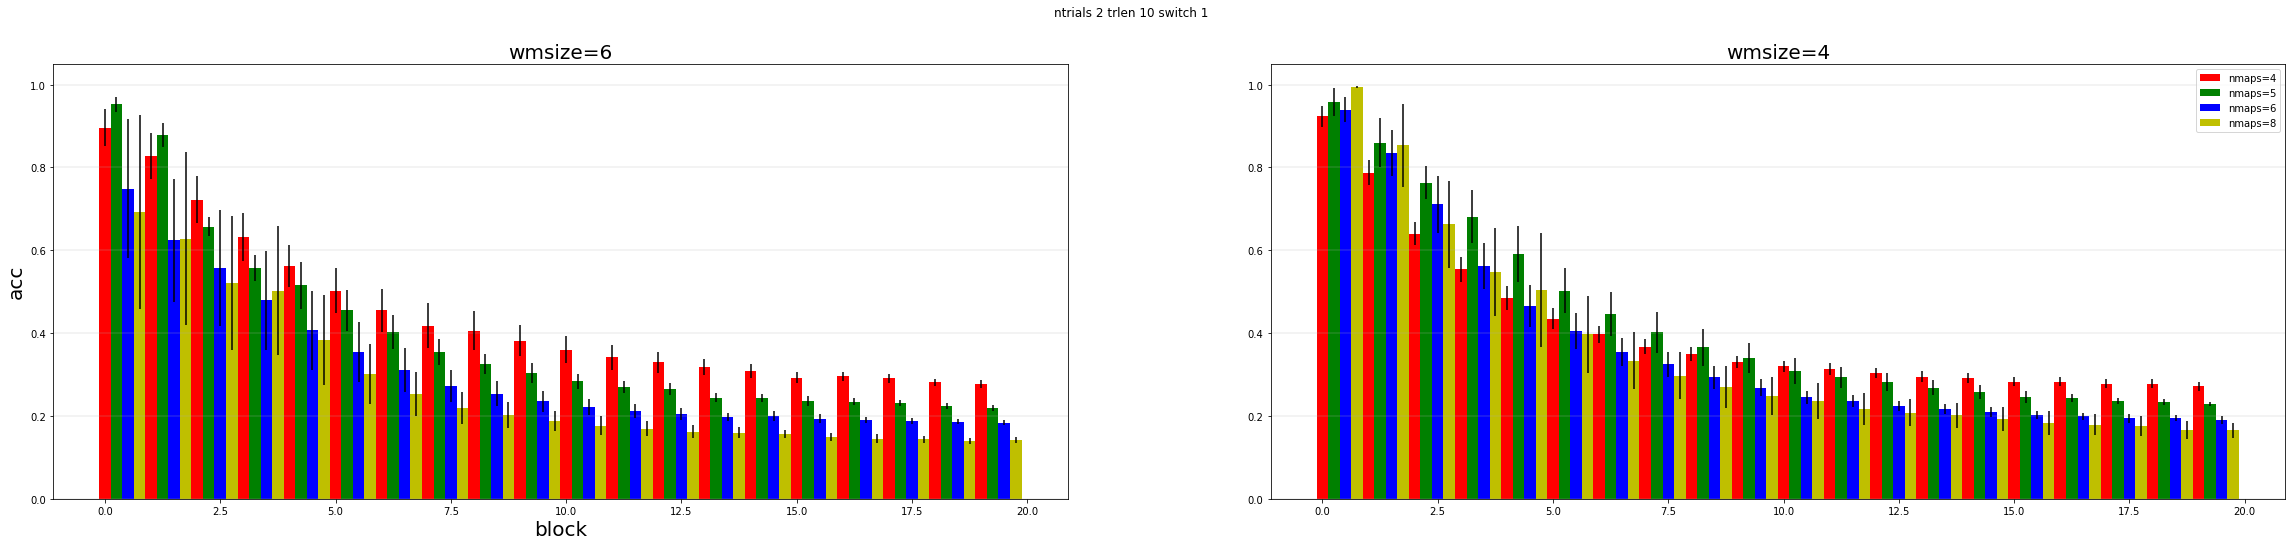

In [318]:
''' accuracy over blocks '''
trlen = 10
switch = 1
ntrials = 2
f=4
fig,axarr = plt.subplots(1,2,figsize=(10*f,2*f));axarr=axarr.reshape(-1)
plt.suptitle('ntrials %i trlen %i switch %i '%(ntrials,trlen,switch))

for wmsize in wmsizeL:
  for idx,nmaps in enumerate(nmapsL):

    ax = axarr[int(wmsize==4)]
    ax.set_ylim(0,1.05)
    ax.set_title('wmsize=%i'%wmsize,fontsize=20)
    evsc = load_evsc(wmsize,nmaps,switch,ntrials,trlen,nnets=20)
    if not len(evsc): continue
    evac = evsc[:,:,:,nmaps:].mean((1,-1))
    M = evac.mean(0)
    S = evac.std(0)/np.sqrt(len(evac))
    lab=None
    for i in range(len(M)):
      if i==len(M)-1: lab='nmaps=%i'%nmaps
      ax.bar(i+.25*idx,M[i],yerr=S[i],width=.25,lw=3,color=['r','g','b','y'][idx],label=lab)
    ax.grid(axis='y',lw=.3)
axarr[1].legend()
axarr[0].set_xlabel('block',fontsize=20)
axarr[0].set_ylabel('acc',fontsize=20)
plt.savefig('figures/amtask_pieval/eval_acc-ntrials%itrlen%iswitch%i'%(ntrials,trlen,switch))
            
            
            

# separation

In [45]:
def load_states_subj(wmsize,nmaps,switch,ntrials,trlen,seed=0,hc=0,phase=0):
  ''' 
  selects which state (c or h)
  selects relevant timesteps (encoding,test,both)
  reshapes to uncat trial and trlen dimensions
  hc = 0 
  phase = 0 # 0:encoding,1:test,2:both
  '''
  ntrials_ev,trlen_ev = 20,10
  fdir = 'model_data/amtask_pieval/'
  fpath = "wmsize_%i-nmaps_%i-switch_%i-ntrials_%i-trlen_%i-seed_%i-wm_emkw_0.000500-states_ev.npy"%(
              wmsize,nmaps,switch,ntrials,trlen,seed)
  try:
    states_subj = np.load(fdir+fpath) # [neps,tsteps,hc,stsize]
  except:
    return None
  neps,tsteps,_,stsize = states_subj.shape
  ## select h or c state
  states_subj = states_subj[:,:,hc]
  states_subj = states_subj.reshape(neps,ntrials_ev,trlen_ev+nmaps,stsize)
  ## select phase
  if phase==0: # encoding phase
    states_subj = states_subj[:,:,:nmaps]
  elif phase==1: # test phase
    states_subj = states_subj[:,:,nmaps:]
  elif phase==2: # both
    states_subj = states_subj[:]
  return states_subj

def load_states(wmsize,nmaps,switch,ntrials,trlen,nnets=20):
  L = []
  for seed in range(nnets):
    states_subj = load_states_subj(wmsize,nmaps,switch,ntrials,trlen,seed)
    if type(states_subj) == type(None):
      continue
    L.append(states_subj)
  return np.array(L)

def compute_rdm(states,dist_metric='cosine'):
  ''' input states [tsteps,stsize]
  returns rdm [tsteps,tsteps]
  '''
  return distance.cdist(states,states,metric=dist_metric)

def compute_separation(states_subj,max_neps=200,normalize=True):
  ''' 
  separation of tr1tr2 for each epoch
  states_subj [neps,ntrials,tsteps,stsize]
  returns tr1tr2 separation for each epoch
  normalize: divide by mean distance 
  '''
  neps,ntrials,tsteps,stsize = states_subj.shape
  sep_tr1tr2 = -np.ones(max_neps)
  # loop over epochs
  for ep in range(max_neps):
    states_ep = states_subj[ep]
    # select states from first two trials
    states_tr1tr2 = states_ep[(0,1),:] 
    # cat trials on tsteps, compute between trial distances
    states_tr1tr2 = states_tr1tr2.reshape(-1,stsize) 
    rdm_tr1tr2 = compute_rdm(states_tr1tr2)
    # separation as mean off block rdm
    sep_tr1tr2_ep = rdm_tr1tr2[tsteps:,:tsteps].mean()
    if normalize:
       sep_tr1tr2_ep /= rdm_tr1tr2.mean()
    sep_tr1tr2[ep] = sep_tr1tr2_ep
  return sep_tr1tr2

#### compare switch vs no switch
- strong effect for all conditions

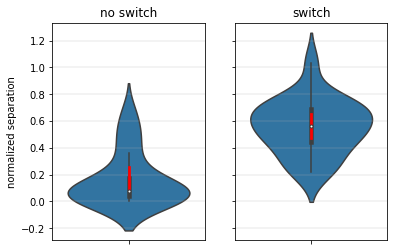

In [37]:
''' compute separations '''
nmaps = 8
wmsize = 4
ntrials = 2
trlen = 6
nnets_plt = 20

L = [[],[]]
for switch in [0,1]:
  states = load_states(wmsize,nmaps,switch,ntrials,trlen,nnets=nnets_plt)
  for states_subj in states:
    sep = compute_separation(states_subj,max_neps=1000,normalize=False)
    L[switch].append(sep.mean())


''' violin plot '''
plt.close('all')
fig,ax = plt.subplots(1,2,sharey=True)

# ax[0].set_ylim(.6,2.3)
ax[0].set_ylabel('normalized separation')

for i in [0,1]:
  sns.violinplot(L[i],ax=ax[i],orient='v')
  sns.barplot(L[i],ax=ax[i],orient='v',errcolor='r',color='white',zorder=0)
  ax[i].grid(axis='y',lw=.3)
  ax[i].set_title(['no switch','switch'][i])

plt.savefig('figures/amtask_pieval/p6/violin-sep')

#### compare ntrials=2 vs ntrials=3
- no effect

In [226]:
''' compute separations '''
nmaps = 4
wmsize = 4
switch = 1
trlen = 6

L = [[],[]]
for ntrials in [2,3]:
  states = load_states(wmsize,nmaps,switch,ntrials,trlen,nnets=20)
  for states_subj in states:
    sep = compute_separation(states_subj)
    L[ntrials-2].append(sep.mean())

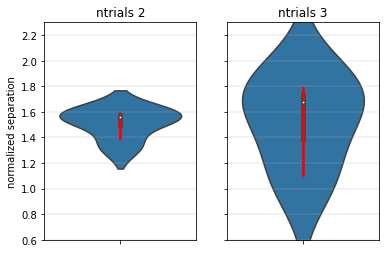

In [225]:
''' violin plot '''
fig,ax = plt.subplots(1,2,sharey=True)

ax[0].set_ylim(.6,2.3)
ax[0].set_ylabel('normalized separation')
  
for i in [0,1]:
  sns.violinplot(L[i],ax=ax[i],orient='v')
  sns.barplot(L[i],ax=ax[i],orient='v',errcolor='r',color='white',zorder=0)
  ax[i].grid(axis='y',lw=.3)
  ax[i].set_title('ntrials %i'%(i+2))

### relate tr12_sep to proactive interference, net by net
- PI measures
    - difference in acc between tr1tr2
    - acc in tr 10 (does not work, different nets have different baselines)
- NB, because I have sep and acc on an epoch by epoch basis, I could do this analysis within subject

(0,) (0,)


IndexError: too many indices for array

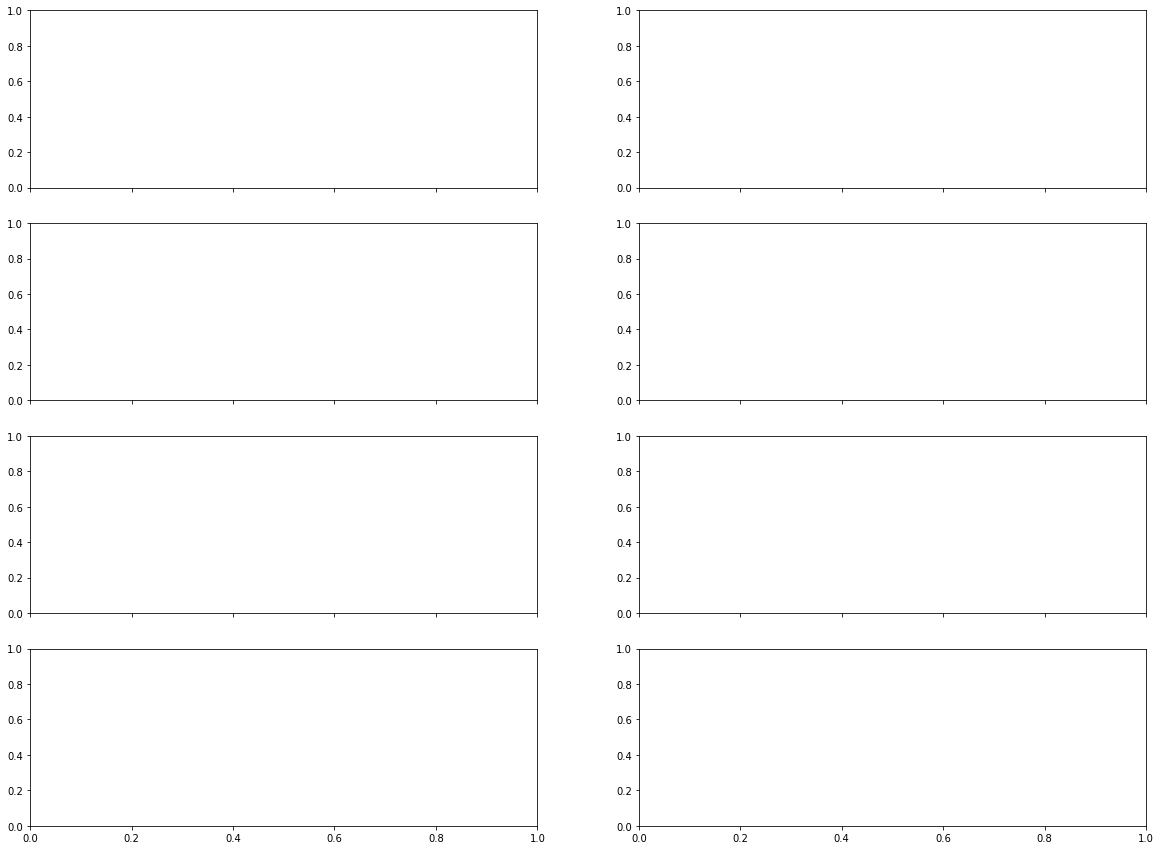

In [50]:
''' 
scatter plot, 
switch0 red, switch1 blue
2trials circle, 3trials cross
'''
# params
switch = 1
wmsize,nmaps = 4,4
trlen = 10
# computing PI:
ntrials = 2
tr1,tr2 = 0,4

sepL = []
evacL = []
nnets_plt = 20
for seed in range(nnets_plt):
  # load evsc and states
  evsc = load_evsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed)
  if type(evsc) == type(None):continue
  states_subj = load_states_subj(wmsize,nmaps,switch,ntrials,trlen,seed,hc=0,phase=0)
  if type(states_subj) == type(None):continue  
  # separation
  sep = compute_separation(states_subj,max_neps=1000,normalize=False)
  sep = sep.mean()
  sepL.append(sep)
  # proactive interference
  evac = evsc[:,:,nmaps:].mean(0)
  evacL.append(evac)
  
evac = np.array(evacL)
sep = np.array(sepL)
print(sep.shape,evac.shape)

# plt
fig,axarr = plt.subplots(4,2,figsize=(20,15),sharex=True,sharey=False);axarr=axarr.reshape(-1)
evac_diffL = []
for tr2 in range(1,9):
  ax = axarr[tr2-1]
  evac_diff = (evac[:,tr1] - evac[:,tr2]).mean(-1)
  sns.regplot(sep,evac_diff,ax=ax,color='b')
  ax.set_ylabel('acc diff tr0 tr%i'%tr2)
  ax.set_title('r=%.2f, p=%.4f'%pearsonr(sep,evac_diff))

# plt.savefig('figures/amtask_pieval/p6/replot-PI_sep')


0 3 r=0.90, p=0.0064
1 3 r=0.79, p=0.0342


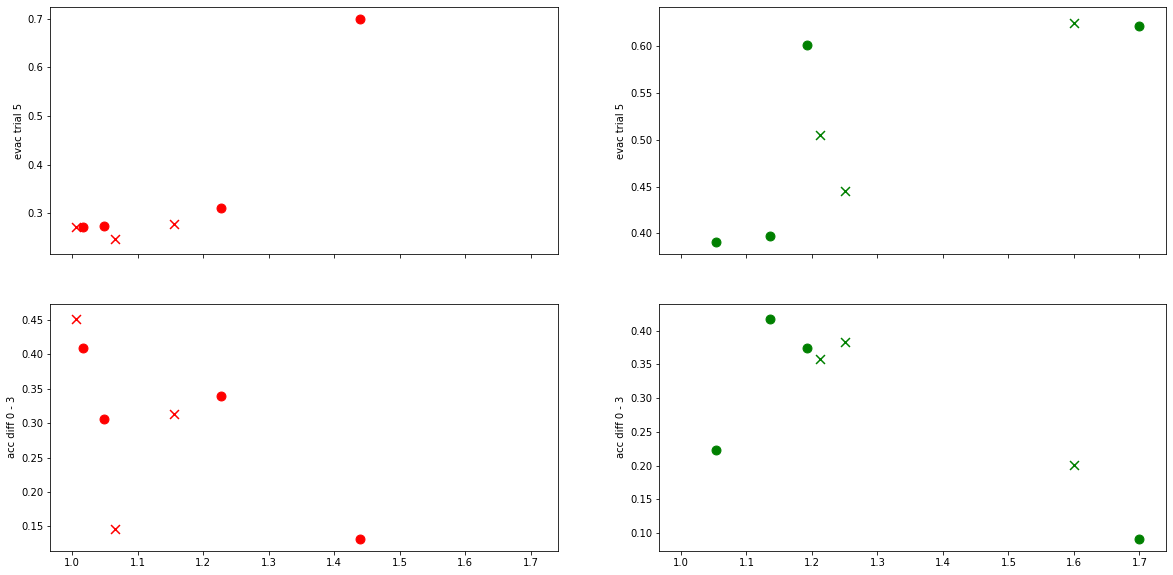

In [335]:
''' 
scatter plot, 
switch0 red, switch1 blue
2trials circle, 3trials cross
'''

wmsize,nmaps = 4,5
trlen = 10
# computing PI:
target_trial = 5
tr1,tr2 = 0,3
# plt
nnets_plt = 20
fig,axarr = plt.subplots(2,2,figsize=(20,10),sharex=True,sharey=False)
for switch,c in zip([0,1],['r','g']):
  ax = axarr[:,switch]
  sepL = []
  evac_targetL = []
  evac_diffL = []
  for ntrials,ms in zip([2,3],['o','x']):
    for seed in range(nnets_plt):
      evsc = load_evsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed)
      if type(evsc) == type(None):continue
      # proactive interference
      evac = evsc[:,:,nmaps:].mean(0)
      evac_target = evac[target_trial,:].mean(-1)
      evac_diff = (evac[tr1] - evac[tr2]).mean()
      # separation
      states_subj = load_states_subj(wmsize,nmaps,switch,ntrials,trlen,seed,hc=0,phase=0)
      if type(states_subj) == type(None):continue
      sep = compute_separation(states_subj,max_neps=1000,normalize=True)
      sep = sep.mean()
      # collect for pearsonr
      sepL.append(sep)
      evac_targetL.append(evac_target)
      evac_diffL.append(evac_diff)
      # plt
      ax[0].scatter(sep,evac_target,c=c,marker=ms,s=80)
      ax[0].set_ylabel('evac trial %i'%target_trial)
      ax[1].scatter(sep,evac_diff,c=c,marker=ms,s=80)
      ax[1].set_ylabel('acc diff %i - %i'%(tr1,tr2))
  print(switch,ntrials,'r=%.2f, p=%.4f'%pearsonr(sepL,evac_targetL))
